<a href="https://colab.research.google.com/github/SAISKAND/Python-projects/blob/main/ML_Algorithms_scratch/kmeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
df=pd.read_csv('/content/drive/MyDrive/Data for ML lab/Mall_Customers.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


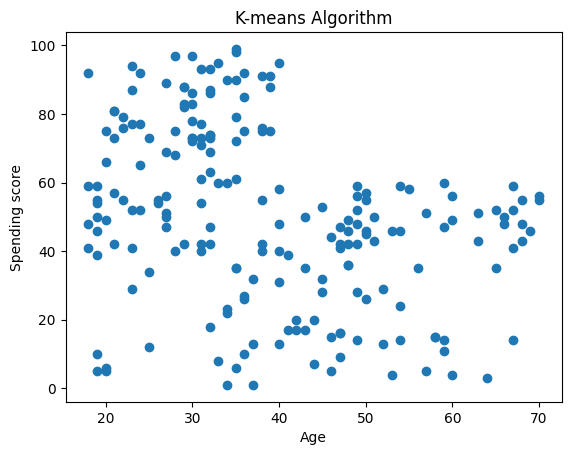

In [ ]:
def plot_data():
  plt.scatter(df['Age'],df['Spending Score (1-100)'])
  plt.xlabel('Age')
  plt.ylabel('Spending score')
  plt.title('K-means Algorithm')
plot_data()

Enter value of k:5
[47.01275737 36.06307379 65.60528946 40.69844903 61.03536074]
[33.07714947 41.33612247 32.11350557 87.23669762 21.74415678]


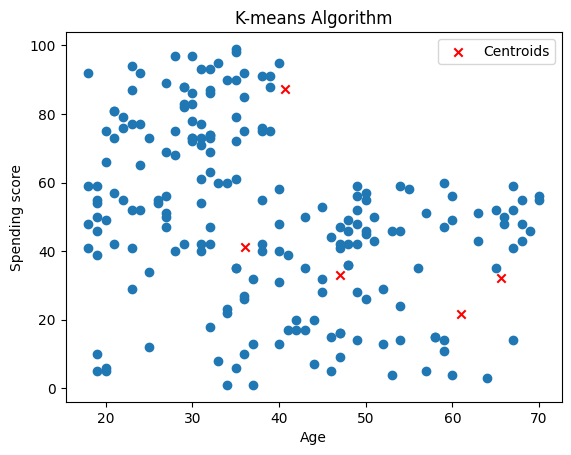

In [ ]:
#Randomly chosen centroids
from random import randint
k=int(input("Enter value of k:"))
x_min,y_min=df['Age'].min(),df['Spending Score (1-100)'].min()
x_max,y_max=df['Age'].max(),df['Spending Score (1-100)'].max()
centroids_x = np.random.uniform(low=x_min, high=x_max, size=k)
print(centroids_x)
centroids_y = np.random.uniform(low=y_min, high=y_max, size=k)
print(centroids_y)
centroids = np.column_stack((centroids_x, centroids_y))
plot_data()
plt.scatter(centroids_x,centroids_y,marker='x',color='red',label='Centroids')
plt.legend()


In [ ]:
def calc_distance(point, centroid):
    return np.sqrt((point[0] - centroid[0])**2 + (point[1] - centroid[1])**2)

def assign_cluster(data, centroids):
    clusters = np.zeros(len(data))
    for i, point in enumerate(data):
        distances = [calc_distance(point, centroid) for centroid in centroids]
        cluster = np.argmin(distances)
        clusters[i] = cluster
    return clusters

def update_centroids(data, clusters, k):
    new_centroids = np.zeros((k, 2))
    for i in range(k):
        cluster_points = data[clusters == i]
        if len(cluster_points) > 0:
            new_centroids[i] = np.mean(cluster_points, axis=0)
        else:
            # If a cluster is empty, keep the centroid unchanged
            new_centroids[i] = centroids[i]
    return new_centroids

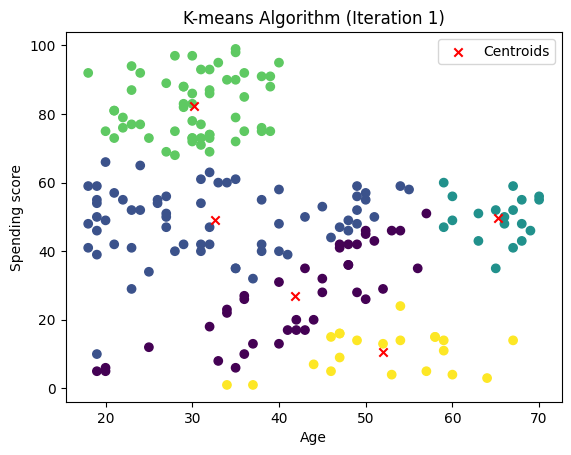

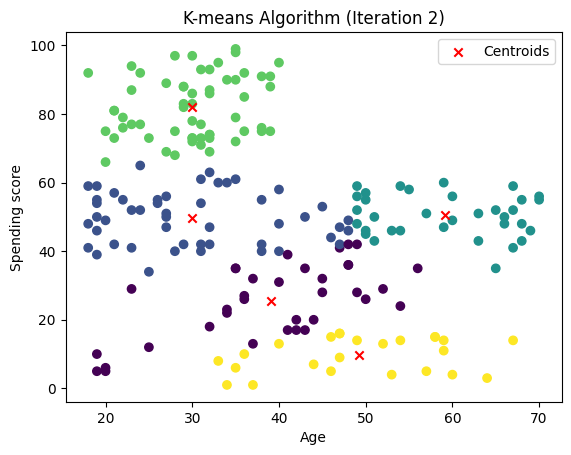

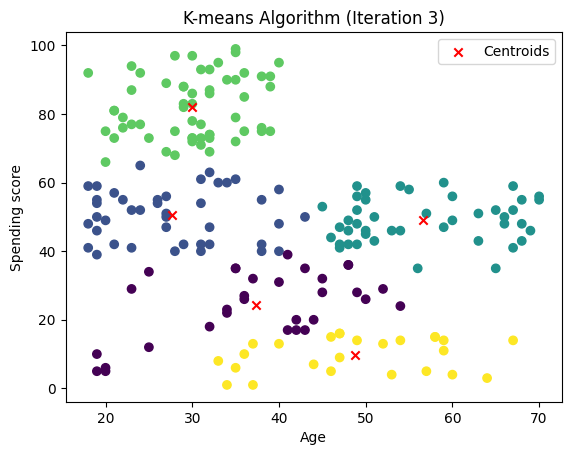

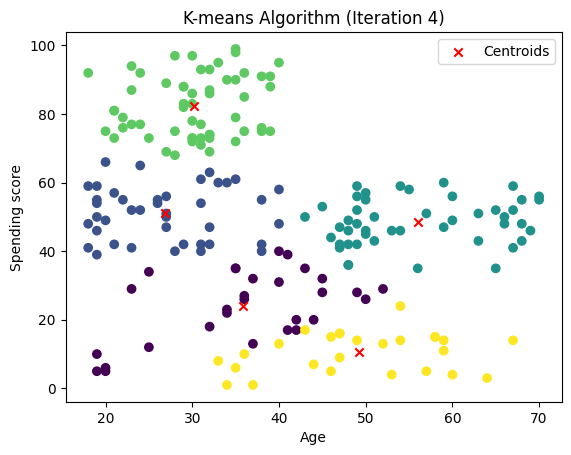

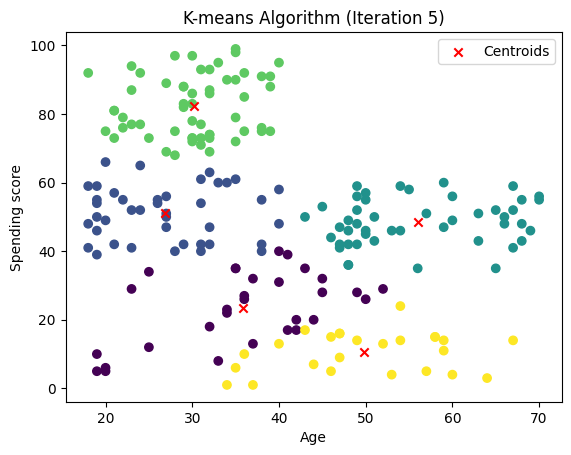

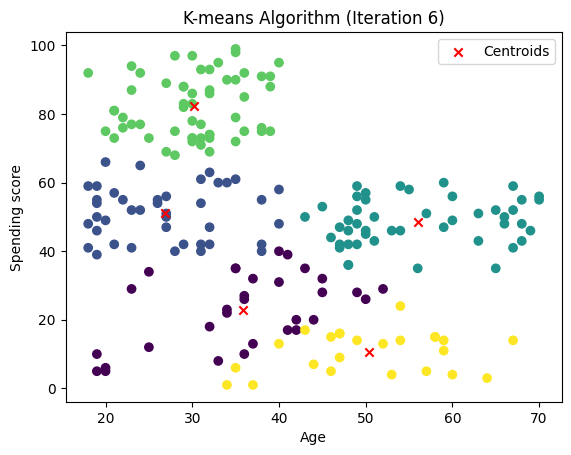

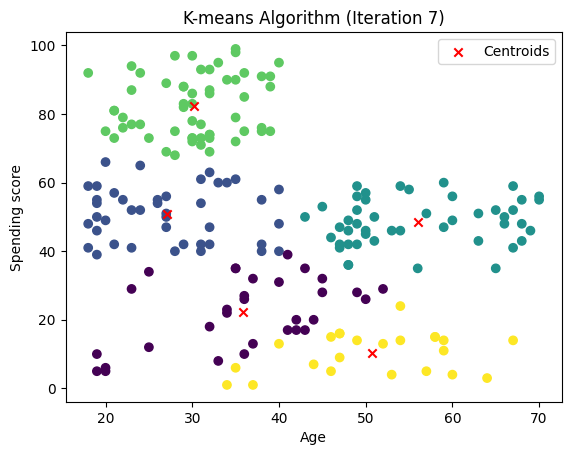

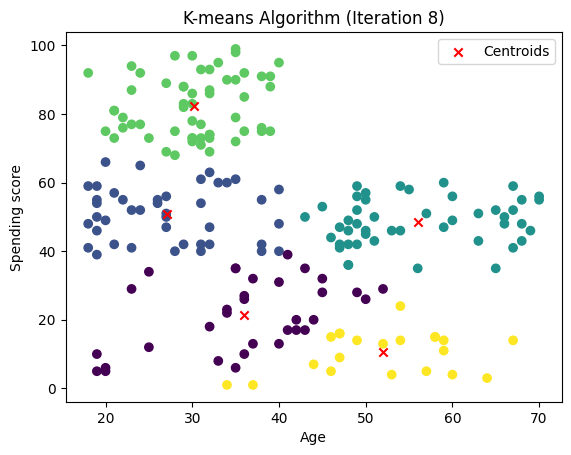

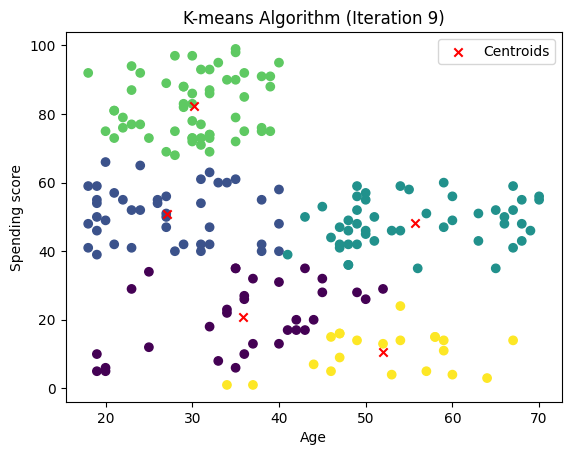

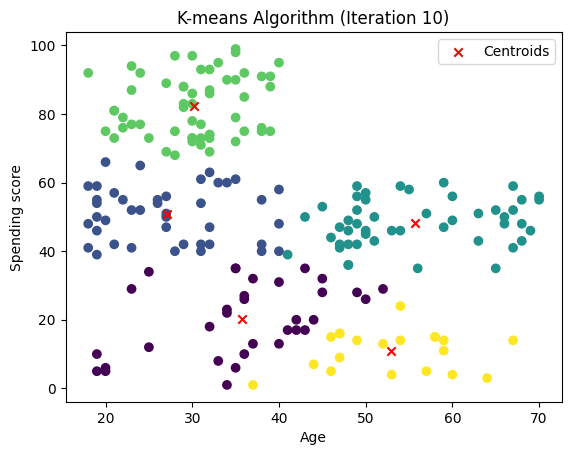

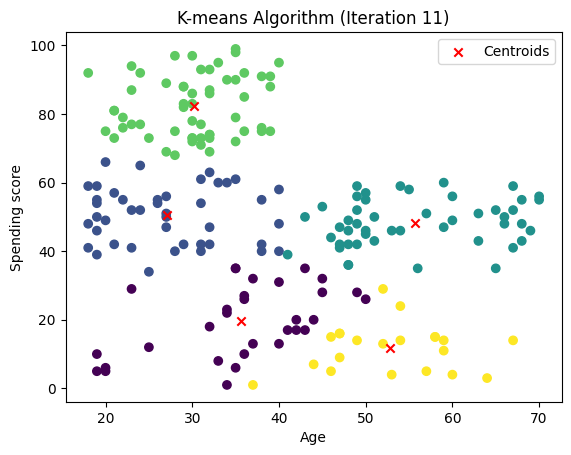

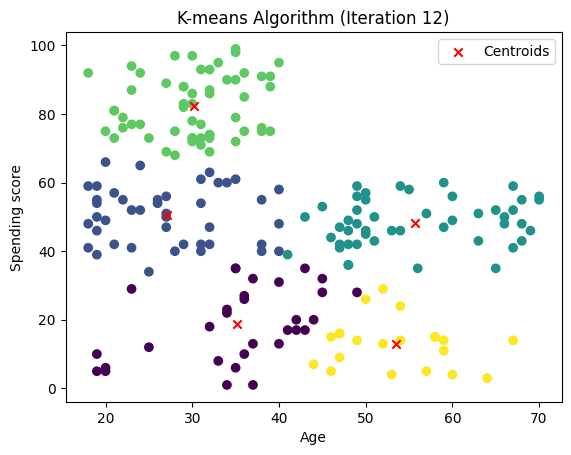

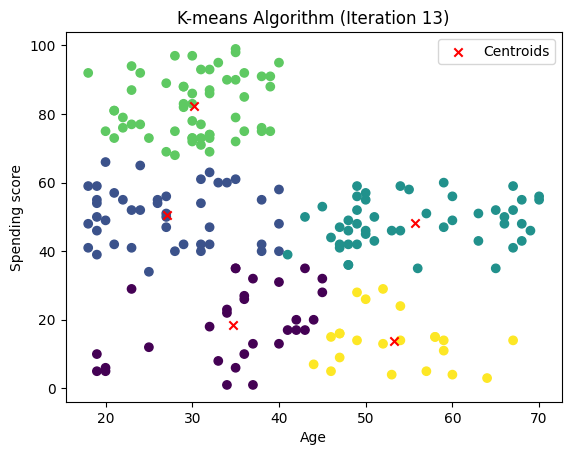

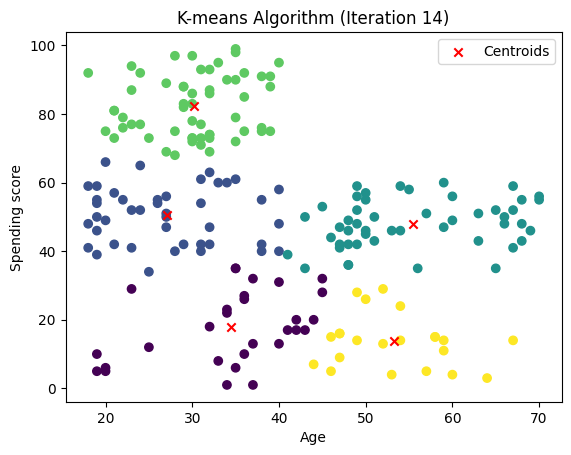

Converged!


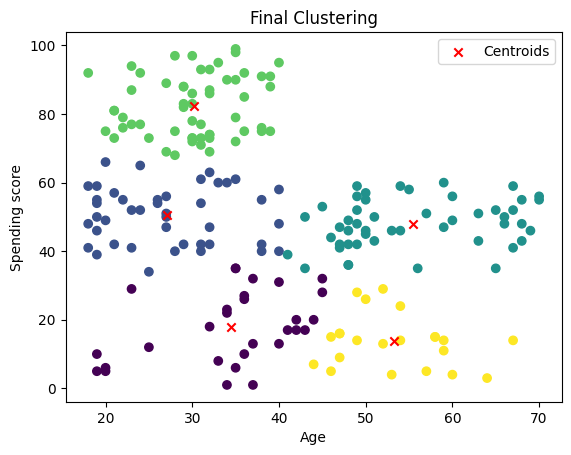

In [ ]:
for _ in range(15):  # Number of iterations
    clusters = assign_cluster(df[['Age', 'Spending Score (1-100)']].values, centroids)
    new_centroids = update_centroids(df[['Age', 'Spending Score (1-100)']].values, clusters, k)

    if np.all(centroids == new_centroids):
        print("Converged!")
        break

    centroids = new_centroids

    plt.figure()
    plt.scatter(df['Age'], df['Spending Score (1-100)'], c=clusters)
    plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', color='red', label='Centroids')
    plt.xlabel('Age')
    plt.ylabel('Spending score')
    plt.title('K-means Algorithm (Iteration {})'.format(_ + 1))
    plt.legend()
    plt.show()

plt.figure()
plt.scatter(df['Age'], df['Spending Score (1-100)'], c=clusters)
plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', color='red', label='Centroids')
plt.xlabel('Age')
plt.ylabel('Spending score')
plt.title('Final Clustering')
plt.legend()
plt.show()